In [1]:
import matplotlib.pyplot as plt
from cycler import cycler
import pandas as pd
import numpy as np
from polan import fp2poly,plot_poly

In [2]:
#define a reference profile based on a representative polysome experimental profile
ref_peaks = [0.003, 0.0051, 0.026, 0.018, 0.0205, 0.0155, 0.012, 0.0085, 0.008, 0.006, 0.005, 0.0035, 0.002, 0.0015, 0.001, 0.0005, 0.0002, 5e-05]
ref_peaks = ref_peaks/ np.sum(ref_peaks)
x_ref,y_ref = plot_poly(ref_peaks)

<h1>Comparisons of data with/without cycloheximide</h1>
<p>These analyses evalate two datasets that compare profiles with and without addition of cycloheximide before cell lysis, <a href="https://www.ncbi.nlm.nih.gov/pubmed/24759091" target=_blank>Vaidyanathan <i>et al.</i> (2015)</a> (dataset <a href="https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE51532" target=_blank>GSE51532</a>) and <a href="https://www.ncbi.nlm.nih.gov/pubmed/30916348" target=_blank>Santos <i>et al.</i> (2019)</a> (dataset<a href="https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE125038" target=_blank>GSE125038</a>). </p>

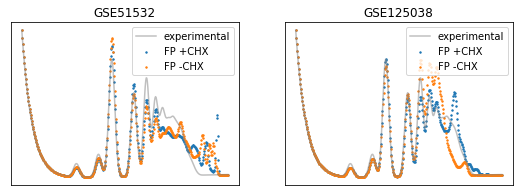

In [3]:
#prepare plots and variables
labels = ['FP +CHX','FP -CHX']
fig,ax = plt.subplots(1,2,figsize=(9,3))
poly_vols_Vaid = []

#calculate and plot the polysome profiles for the Vaidyanathan et al. data
for file in ['GSE51532','GSE51532_noCH']:
    poly_vols_Vaid.append(fp2poly(file,use_ref_RNA = False))

ax[0].plot(x_ref,y_ref,c='grey', label='experimental',alpha = 0.5)
for trace_no in range(len(poly_vols_Vaid)):
    x,y = plot_poly(poly_vols_Vaid[trace_no])
    ax[0].scatter(x,y,s=2,label = labels[trace_no])
ax[0].set_yticks([])
ax[0].set_xticks([])
ax[0].legend(loc='upper right')
ax[0].set_title('GSE51532')
    
#calculate and plotsthe polysome profiles for the Santos et al data
poly_vols_Sant = []
for file in ['GSE125038','GSE125038_noCH']:
    poly_vols_Sant.append(fp2poly(file,use_ref_RNA = False))

ax[1].plot(x_ref,y_ref,c='grey', label='experimental',alpha = 0.5)
for trace_no in range(len(poly_vols_Sant)):
    x,y = plot_poly(poly_vols_Sant[trace_no])
    ax[1].scatter(x,y,s=2,label = labels[trace_no])
ax[1].set_yticks([])
ax[1].set_xticks([])
ax[1].legend(loc='upper right')
ax[1].set_title('GSE125038')

#plt.savefig('Supp CHX.svg')

plt.show()